<a href="https://colab.research.google.com/github/marceloBilbyIA/neural-network/blob/main/MODULO%205/Reconhecimento_de_caracteres_da_placa_de_um_carro_OCR_com_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Equipe 1

#Problema

Com o aumento da frota, O Brasil já possui um automóvel para cada 4,4 habitantes(Associação Nacional dos Detrans), e realizar o processo de leitura de placas e identificação do veículo de maneira manual se torna um processo caro e sujeito a erros, principalmente pelo fato de posicionar um fiscal em um via pública anotando as placas em qualquer que seja a situação do tempo, tornando este trabalho insalubre

#Solução

Com o objetivo de tornar o processo mais rápido e confiável, utilizaremos a visão computacional para através reconhecimento de caracteres identificar as placas dos veículos

# OCR com Python e Tesseract

# Reconhecimento de texto em imagens

# Instalação do Tesseract

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!mkdir tessdata
!wget -O ./tessdata/por.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘tessdata’: File exists
--2022-07-22 13:35:33--  https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata [following]
--2022-07-22 13:35:33--  https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata
Reusing existing conne

In [ ]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!tesseract --help-psm

Page segmentation modes:
  0    Orientation and script detection (OSD) only.
  1    Automatic page segmentation with OSD.
  2    Automatic page segmentation, but no OSD, or OCR.
  3    Fully automatic page segmentation, but no OSD. (Default)
  4    Assume a single column of text of variable sizes.
  5    Assume a single uniform block of vertically aligned text.
  6    Assume a single uniform block of text.
  7    Treat the image as a single text line.
  8    Treat the image as a single word.
  9    Treat the image as a single word in a circle.
 10    Treat the image as a single character.
 11    Sparse text. Find as much text as possible in no particular order.
 12    Sparse text with OSD.
 13    Raw line. Treat the image as a single text line,
       bypassing hacks that are Tesseract-specific.


#Importando as Bibliotecas

In [ ]:
import pytesseract
import numpy as np
import imutils
import cv2 #OpenCV
#from pytesseract import Output
from google.colab import drive
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
#from tensorflow.keras.callbacks import ModelCheckpoint

#Acessando Google Drive

In [ ]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Função Mostrar

In [ ]:
def mostrar(img):
  fig = plt.gcf()
  fig.set_size_inches(16, 8)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()

# Tratamento da Imagem

In [ ]:
img = cv2.imread('/content/gdrive/MyDrive/Imagens/Placa 4.jpg')
(H, W, L) = img.shape[:3]
print(H, W, L)

545 984 3


#Imagem Original

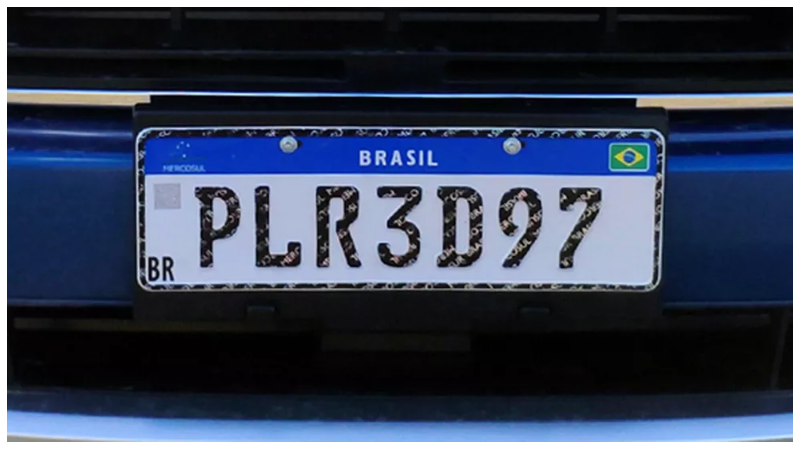

In [ ]:
mostrar(img)

#Conversão para escala de cinza

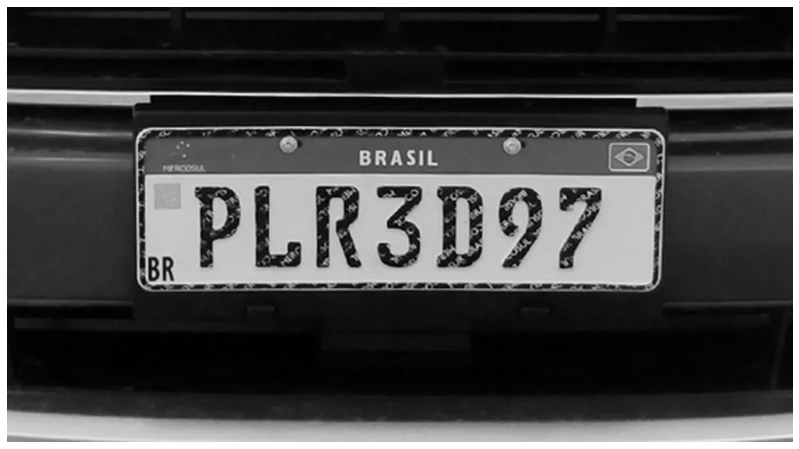

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
mostrar(gray)

# Desfoque

In [ ]:
#cv2.bilateralFilter(img_small, ksize, sigma_color, sigma_space)

#img_small: É a imagem que deve ser desfocada 

# sigmaColor Filtra sigma no espaço de cores. Um valor maior do parâmetro significa que as cores mais distantes dentro da vizinhança do pixel serão misturadas,
# resultando em áreas maiores de cores semi-iguais.

#sigmaSpace Filtra sigma no espaço de coordenadas. Um valor maior do parâmetro significa que pixels mais distantes influenciarão uns aos outros desde que suas cores estejam próximas o suficiente.
# Quando d>0, especifica o tamanho da vizinhança independente do sigmaSpace.

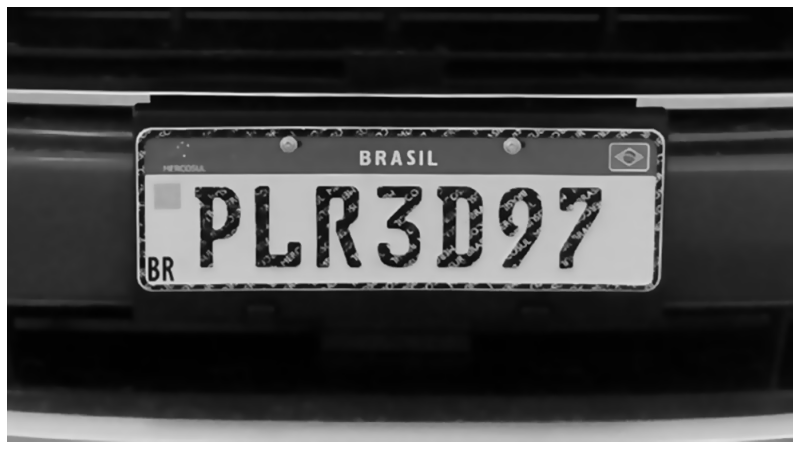

In [ ]:
blur = cv2.bilateralFilter(gray, 11, 17, 17)
mostrar(blur)

#Detecção de Borda

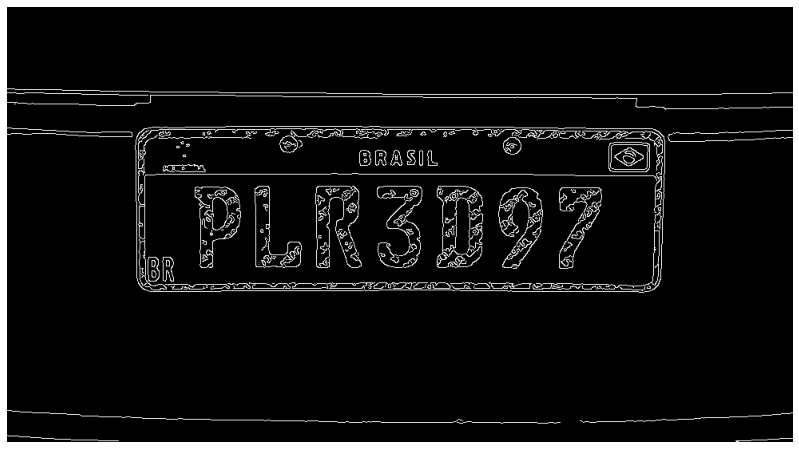

In [ ]:
edge = cv2.Canny(blur, 30, 200)
mostrar(edge)

# Detecção dos contornos

In [ ]:
contornos = cv2.findContours(edge.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contornos = imutils.grab_contours(contornos)
contornos = sorted(contornos, key=cv2.contourArea, reverse=True)[:8]

In [ ]:
contornos

[array([[[274, 149]],
 
        [[273, 150]],
 
        [[223, 150]],
 
        [[222, 151]],
 
        [[201, 151]],
 
        [[200, 150]],
 
        [[195, 150]],
 
        [[194, 151]],
 
        [[192, 151]],
 
        [[191, 150]],
 
        [[181, 150]],
 
        [[180, 151]],
 
        [[176, 151]],
 
        [[175, 152]],
 
        [[171, 152]],
 
        [[167, 156]],
 
        [[166, 156]],
 
        [[164, 158]],
 
        [[164, 159]],
 
        [[163, 160]],
 
        [[163, 161]],
 
        [[162, 162]],
 
        [[162, 165]],
 
        [[161, 166]],
 
        [[161, 172]],
 
        [[160, 173]],
 
        [[160, 178]],
 
        [[161, 179]],
 
        [[161, 243]],
 
        [[162, 244]],
 
        [[162, 339]],
 
        [[163, 340]],
 
        [[163, 343]],
 
        [[164, 344]],
 
        [[164, 346]],
 
        [[166, 348]],
 
        [[166, 349]],
 
        [[170, 353]],
 
        [[171, 353]],
 
        [[172, 354]],
 
        [[174, 354]],
 
        [[175, 3

Buscando a região da placa

In [ ]:
localizacao = None
for c in contornos:
  perimetro = cv2.arcLength(c, True)
  aprox = cv2.approxPolyDP(c, 0.02 * perimetro, True)
  if cv2.isContourConvex(aprox):
    if len(aprox) == 4:
      localizacao = aprox
      break

In [ ]:
localizacao

array([[[162, 162]],

       [[178, 356]],

       [[818, 341]],

       [[808, 152]]], dtype=int32)

In [ ]:
mascara = np.zeros(gray.shape, np.uint8)

In [ ]:
mascara.shape

(545, 984)

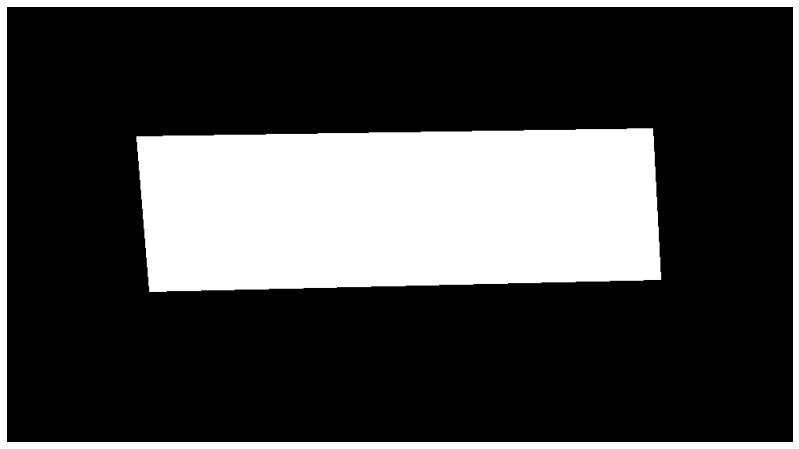

In [ ]:
img_placa = cv2.drawContours(mascara, [localizacao], 0, 255, -1)
mostrar(mascara)

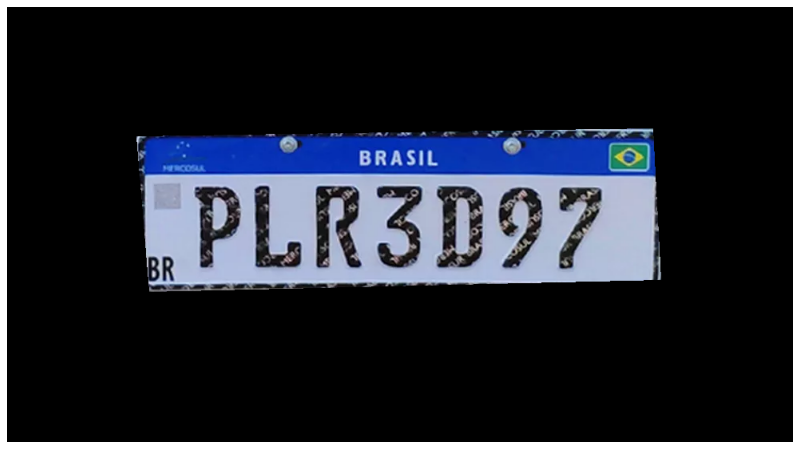

In [ ]:
img_placa = cv2.bitwise_and(img, img, mask=mascara)
mostrar(img_placa)

In [ ]:
(y, x) = np.where(mascara==255)
(inicioX, inicioY) = (np.min(x), np.min(y))
(fimX, fimY) = (np.max(x), np.max(y))

In [ ]:
inicioX, inicioY, fimX, fimY

(162, 152, 818, 356)

In [ ]:
placa = gray[inicioY:fimY, inicioX:fimX]

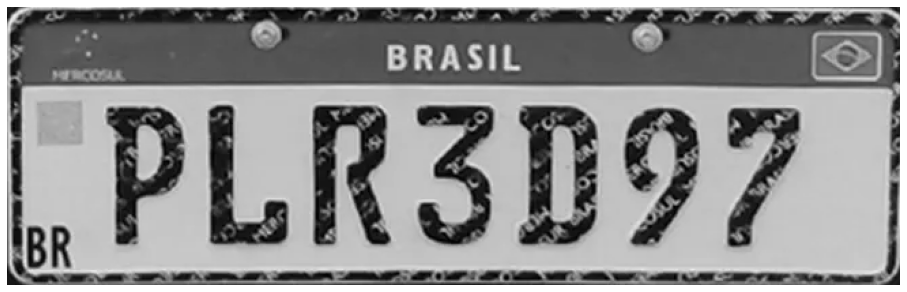

In [ ]:
mostrar(placa)

In [ ]:
tesseract_config = '--tessdata-dir tessdata --psm 6'

In [ ]:
texto = pytesseract.image_to_string(placa, lang="por", config=tesseract_config)

In [ ]:
print(texto)

L PLR3D97



#Melhorando a imagem

In [ ]:
# INTER_CUBIC = A interpolação bicúbica consiste em somar os valores ao redor do pixel.
# Fx = Controle da escala do eixo X
# Fy = Controle da escala do eixo Y
# 0 = Inicio - Preto
# 255 = Fim - Branco

In [ ]:
redimensiona = cv2.resize(placa, None, fx=1.2, fy=1.2, interpolation=cv2.INTER_CUBIC) 
valor, otsu = cv2.threshold(redimensiona, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

In [ ]:
otsu

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

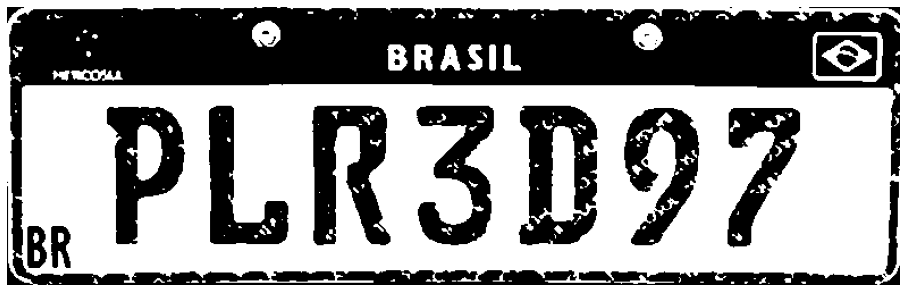

In [ ]:
mostrar(otsu)

# Reconhecimento o texto da placa utilizando OCR

In [ ]:
tesseract_config = '--tessdata-dir tessdata --psm 6'

In [ ]:
texto = pytesseract.image_to_string(otsu, lang="por", config=tesseract_config)

In [ ]:
print(texto)

[ PLR3D97



In [ ]:
texto = "".join(caractere for caractere in texto if caractere.isalnum())

In [ ]:
print(texto)

PLR3D97


#Apresentando a Bounding Box

In [ ]:
#Sintaxe: cv2.putText (imagem, texto, org, fonte, fontScale, color [, thickness [, lineType [, bottomLeftOrigin]]])
#Parâmetros:
#imagem: é a imagem na qual o texto será desenhado.
#text: string de texto a ser desenhada.
#org: São as coordenadas do canto inferior esquerdo da string de texto na imagem. As coordenadas são representadas como tuplas de dois valores, isto é ( valor da coordenada X , valor da coordenada Y ).
#fonte: denota o tipo de fonte. Alguns tipos de fonte são FONT_HERSHEY_SIMPLEX, FONT_HERSHEY_PLAIN, etc.
#fontScale: Fator de escala da fonte que é multiplicado pelo tamanho base específico da fonte.
#color: é a cor da string de texto a ser desenhada. Para BGR , passamos uma tupla. por exemplo: (255, 0, 0) para a cor azul.
#thickness: é a espessura da linha em px .
#lineType: Este é um parâmetro opcional. Fornece o tipo da linha a ser usada.
#bottomLeftOrigin: este é um parâmetro opcional. Quando for verdade, a origem dos dados da imagem está no canto inferior esquerdo. Caso contrário, ele está no canto superior esquerdo.

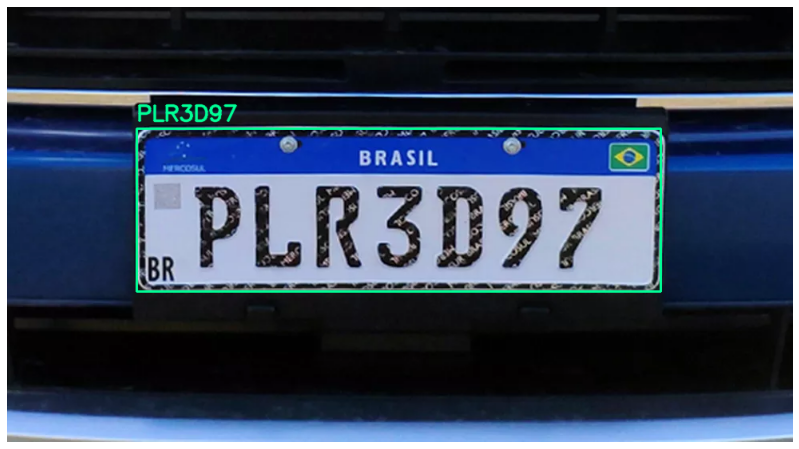

In [ ]:
img = cv2.putText(img, texto, (inicioX, inicioY - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (150,255,0), 2, lineType=cv2.LINE_AA)
img = cv2.rectangle(img, (inicioX, inicioY), (fimX, fimY), (150, 255, 0), 2)
mostrar(img)